GradientBoosting R²: 0.972
GradientBoosting RMSE: 4.275


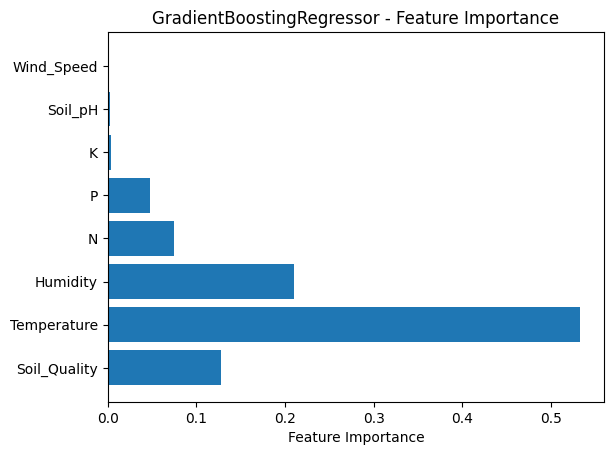

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


ds = pd.read_csv("crop_yield_dataset.csv")
ds["Date"] = pd.to_datetime(ds["Date"])
ds["Year"] = ds["Date"].dt.year
ds["Month"] = ds["Date"].dt.month

crops = ["Tomato", "Wheat", "Corn", "Rice", "Barley", "Soybean", "Cotton", "Sugarcane", "Potato", "Sunflower"]

# ----------------------------------------------------------------------------
# Dataset Selection
# ----------------------------------------------------------------------------

# Select features (from EDA results)
X = ds[["Soil_Quality", "Temperature", "Humidity", "N", "P", "K", "Soil_pH", "Wind_Speed"]]
y = ds["Crop_Yield"]

# Split into train(80%)/test(20%) Model learns on train and checks formulas with test. This is how the R² and RMSE are calculated.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# --------------------------------------------------------------------------
# GBR
# --------------------------------------------------------------------------
# Very similar to RandomForest. Think of GBR as a more “focused” learner that tries to correct its own mistakes step by step.

# Initialize model
gbr = GradientBoostingRegressor(
    n_estimators=200,     # number of boosting stages (like trees)
    learning_rate=0.1,    # how much each tree contributes
    max_depth=5,          # depth of each tree
    random_state=36
)

# Train
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"GradientBoosting R²: {r2:.3f}")
print(f"GradientBoosting RMSE: {rmse:.3f}")


importances = gbr.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("GradientBoostingRegressor - Feature Importance")
plt.show()



